In [29]:
%matplotlib inline
import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

ModuleNotFoundError: No module named 'Image'

In [21]:
fp = "visualization/states_21basic/states.shp"
map_df = gpd.read_file(fp)

In [22]:
map_df.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [23]:
map_df = map_df.drop([0])
map_df = map_df.drop(50)

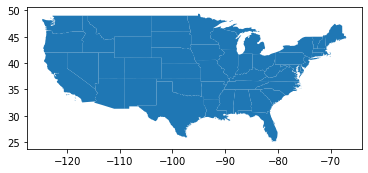

In [24]:
map_df.plot()

In [25]:
df = pd.read_excel("visualization/finalDataUnMod.xlsx")
df.head()

,State,infected_day0,infected_day1,infected_day2,infected_day3,infected_day4,infected_day5,infected_day6,infected_day7,infected_day8,...,infected_day35,infected_day36,infected_day37,infected_day38,infected_day39,infected_day40,infected_day41,infected_day42,infected_day43,infected_day44
0,Alabama,0,0,1,0,1,2,3,4,6,...,549,590,618,681,734,781,833,934,1024,1097
1,Arizona,5,4,8,10,16,24,35,52,74,...,5930,6374,6677,7358,7923,8433,8997,10088,11052,11840
2,Arkansas,0,0,0,1,0,1,2,3,4,...,493,530,555,612,659,702,749,839,920,985
3,California,88,76,148,191,295,435,630,931,1305,...,15356,16504,17289,19052,20514,21837,23295,26120,28618,30657
4,Colorado,8,6,13,17,26,39,57,84,118,...,9489,10198,10684,11773,12676,13494,14395,16141,17684,18944


In [26]:
merged = map_df.set_index("STATE_NAME").join(df.set_index('State'))
merged.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,infected_day0,infected_day1,infected_day2,infected_day3,infected_day4,...,infected_day35,infected_day36,infected_day37,infected_day38,infected_day39,infected_day40,infected_day41,infected_day42,infected_day43,infected_day44
STATE_NAME,,,,,,,,,,,,,,,,,,,,,
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",7.0,6.0,11.0,15.0,23.0,...,8303.0,8923.0,9348.0,10301.0,11092.0,11807.0,12595.0,14123.0,15474.0,16576.0
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.0,0.0,0.0,0.0,1.0,...,60.0,65.0,68.0,75.0,81.0,86.0,92.0,103.0,113.0,121.0
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.0,0.0,0.0,1.0,0.0,...,44.0,47.0,49.0,54.0,59.0,63.0,67.0,75.0,82.0,88.0
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.0,0.0,0.0,0.0,1.0,...,157.0,169.0,177.0,195.0,210.0,224.0,239.0,268.0,294.0,315.0
South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.0,0.0,5.0,4.0,8.0,...,1080.0,1161.0,1216.0,1340.0,1443.0,1536.0,1639.0,1837.0,2013.0,2157.0


NameError: name 'Image' is not defined

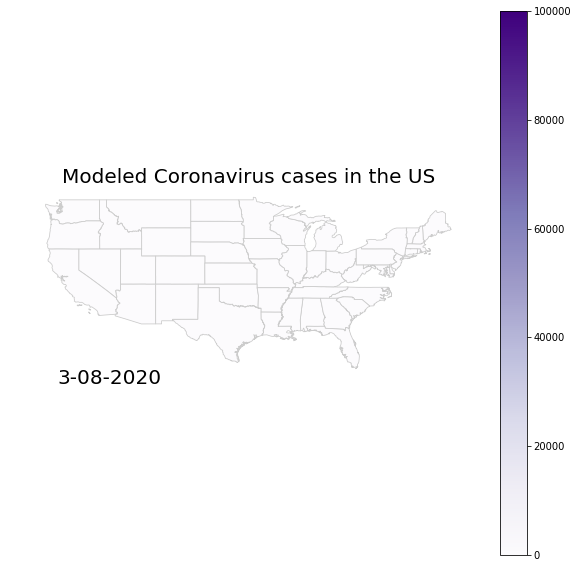

In [28]:
outputPath = 'visualization/finaldata/unmod/'
num = 44

for i in range(num):
    title = "infected_day" + str(i)
    
    vmin, vmax = 0, 100000
    fig = merged.plot(column=title, cmap='Purples', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                           legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Modeled Coronavirus cases in the US', \
                  fontdict={'fontsize': '20',
                            'fontweight' : '2'})
    
    if i < 2:
        datePath = '3-0' + str(i + 8)
    elif 2 <= i < 24:
        datePath = '3-' + str(i + 8)
    elif 24 <= i < 33:
        datePath = '4-0' + str(i - 23)
    else:
        datePath = '4-' + str(i - 24)
    datePath = datePath + '-2020'
    
    # position the annotation to the bottom left
    fig.annotate(datePath,
            xy=(0.1, .35), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
    
    plt.savefig(outputPath + datePath + ".png")
    Image.open(outputPath + datePath + ".png").save(outputPath + datePath + ".jpg", "JPEG")